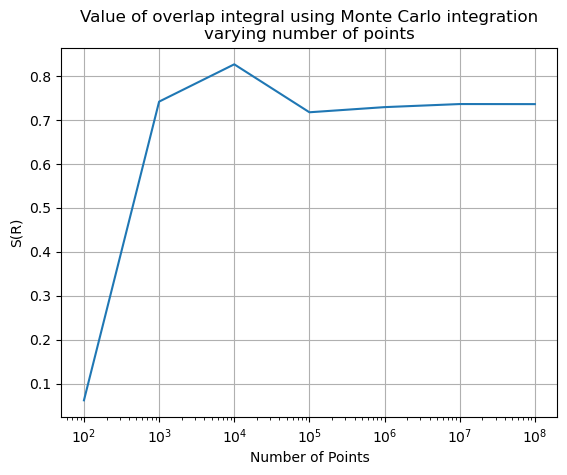

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import p_z

# set random seed for integration
np.random.seed(42)

# set separation distance and sufficient L
R = 2
L = 20

# initialize arrays
num_pts = [100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
overlaps = []

# perform Monte Carlo integration for each number of points
for n in num_pts:
    # set up grids for each coordinate
    x = np.random.uniform(0, L, n)
    y = np.random.uniform(0, L, n)
    z = np.random.uniform(0, L, n)

    # obtain overlap values at each point
    integrand = p_z.psi_2p_z(x, y, z + R / 2) * p_z.psi_2p_z(x, y, z - R / 2)

    # calculate the overlap integral
    V = (2 * L)**3
    overlap_integral = V * np.mean(integrand)
    overlaps.append(overlap_integral)

# plot the results
plt.semilogx(num_pts, overlaps)
plt.xlabel('Number of Points')
plt.ylabel('S(R)')
plt.title('Value of overlap integral using Monte Carlo integration\nvarying number of points')
plt.grid(True)
plt.show()

In [11]:
# Using a uniform sampling distribution results in decent convergence 
# with 10e5 points sampled. Approximations with less points sampled were,
# for the most part, quite far off from the converged value.

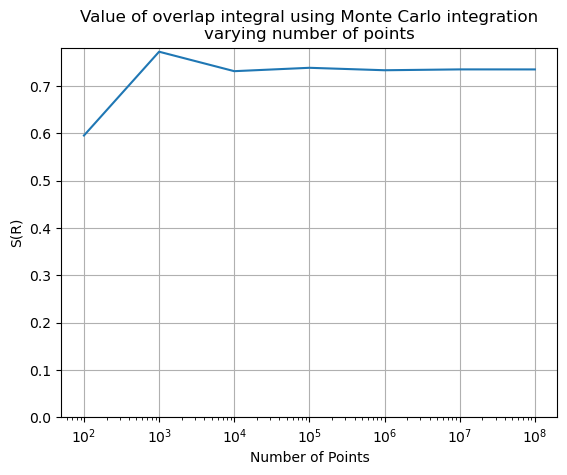

In [4]:
from scipy.stats import expon

# initialize overlaps array
overlaps = []

# perform Monte Carlo integration for each number of points with importance sampling
for n in num_pts:    
    # set up grids for each coordinate
    x = expon.rvs(size=n, scale=6)
    y = expon.rvs(size=n, scale=6)
    z = expon.rvs(size=n, scale=6)
    
    # obtain overlap values at each point with appropriate scaling
    denom = expon.pdf(x, scale=6) * expon.pdf(y, scale=6) * expon.pdf(z, scale=6)
    numer = p_z.psi_2p_z(x, y, z + R / 2) * p_z.psi_2p_z(x, y, z - R / 2)
    integrand = numer / denom

    # calculate the overlap integral
    V = (2)**3
    overlap_integral = V * np.mean(integrand)
    overlaps.append(overlap_integral)
    
# plot the results
plt.semilogx(num_pts, overlaps)
plt.ylim(ymin=0)
plt.xlabel('Number of Points')
plt.ylabel('S(R)')
plt.title('Value of overlap integral using Monte Carlo integration\nvarying number of points')
plt.grid(True)
plt.show()

In [5]:
# Using an importance sampling distribution, even with only 100 points, 
# the estimation is ~1.5 off from the converged value. The values
# converge much quicker than with random sampling.

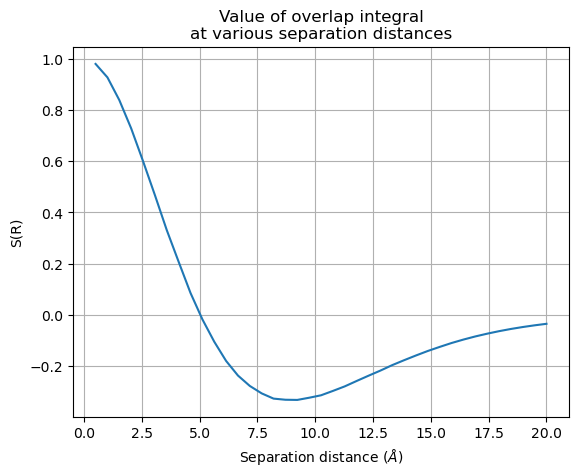

In [7]:
Rs = np.linspace(0.5, 20, 39)
n = 1000000

# initialize overlaps array
overlaps = []

# perform Monte Carlo integration for each number of points with importance sampling
for R in Rs:    
    # set up grids for each coordinate
    x = expon.rvs(size=n, scale=6)
    y = expon.rvs(size=n, scale=6)
    z = expon.rvs(size=n, scale=6)
    
    # obtain overlap values at each point with appropriate scaling
    denom = expon.pdf(x, scale=6) * expon.pdf(y, scale=6) * expon.pdf(z, scale=6)
    numer = p_z.psi_2p_z(x, y, z + R / 2) * p_z.psi_2p_z(x, y, z - R / 2)
    integrand = numer / denom

    # calculate the overlap integral
    V = (2)**3
    overlap_integral = V * np.mean(integrand)
    overlaps.append(overlap_integral)
    
# plot the results
plt.plot(Rs, overlaps)
plt.xlabel('Separation distance ($\AA$)')
plt.ylabel('S(R)')
plt.title('Value of overlap integral\nat various separation distances')
plt.grid(True)
plt.show()

In [8]:
# The 2p_z orbitals have two lobes, when same phase lobes overlap, they
# constructively interfere, leading to a positive overlap. When two out
# of phase lobes overlap, they destructively interfere, resulting in a
# negative overlap. When two p orbitals have no separation distance, they
# interfere purely constructively. The minimum in the overlap integral 
# occurs when the orbitals are separated by half of their length in the z
# direction because the overlap will be completely out of phase.

# Importance sampling increases efficiency because it uses a distribution
# to weight the likelihood of sampling from various points; those that 
# contribute more to the integral are more likely to be chosen.